✅ New origin selected: (14, 20)


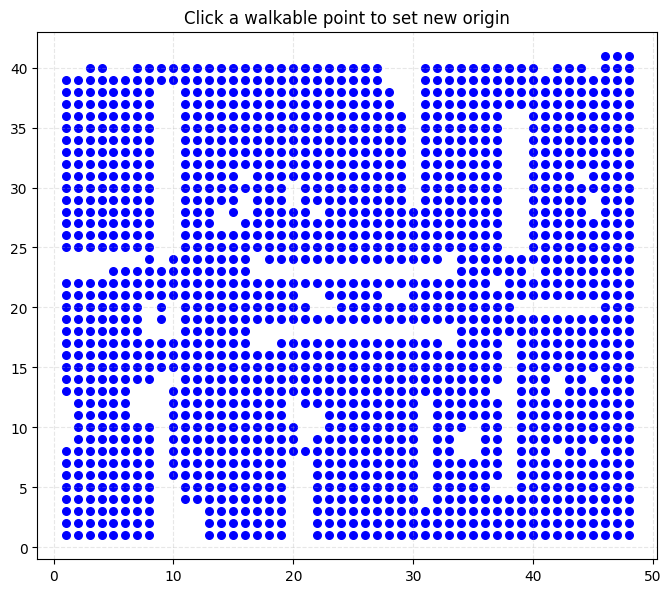

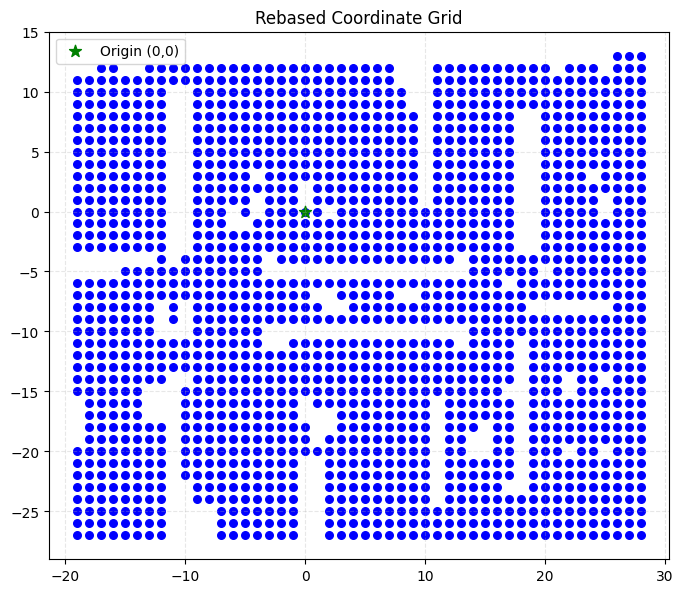

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

def load_grid_from_txt(path):
    return np.loadtxt(path, dtype=int)

def grid_to_coordinates(grid, tile_size=1.0):
    rows, cols = grid.shape
    coord_map = {}
    for i in range(rows):
        for j in range(cols):
            if grid[i, j] == 0:
                x = j * tile_size
                y = (rows - 1 - i) * tile_size
                coord_map[(i, j)] = (x, y)
    return coord_map

def rebase_coordinates(coord_map, new_origin_ij):
    origin_xy = coord_map[new_origin_ij]
    rebased = {ij: (x - origin_xy[0], y - origin_xy[1]) for ij, (x, y) in coord_map.items()}
    return rebased

def find_nearest_walkable(coord_map, x_click, y_click):
    return min(coord_map.items(), key=lambda item: (item[1][0] - x_click) ** 2 + (item[1][1] - y_click) ** 2)[0]

def start_gui(grid, coord_map):
    root = tk.Tk()
    root.title("Click to Select New Origin")

    fig, ax = plt.subplots(figsize=(8, 8))
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack(fill=tk.BOTH, expand=True)

    xs = [x for x, y in coord_map.values()]
    ys = [y for x, y in coord_map.values()]
    ax.scatter(xs, ys, c='blue', s=30)
    ax.set_title("Click a walkable point to set new origin")
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.3)

    def on_click(event):
        if event.xdata is None or event.ydata is None:
            return
        x_click, y_click = event.xdata, event.ydata
        selected_ij = find_nearest_walkable(coord_map, x_click, y_click)
        print(f"✅ New origin selected: {selected_ij}")

        rebased = rebase_coordinates(coord_map, selected_ij)
        plot_rebased_grid(rebased)
        root.destroy()

    fig.canvas.mpl_connect("button_press_event", on_click)
    canvas.draw()
    root.mainloop()

def plot_rebased_grid(rebased_map):
    xs = [x for x, y in rebased_map.values()]
    ys = [y for x, y in rebased_map.values()]
    plt.figure(figsize=(8, 8))
    plt.scatter(xs, ys, c='blue', s=30)
    plt.scatter(0, 0, c='green', s=80, marker='*', label="Origin (0,0)")
    plt.title("Rebased Coordinate Grid")
    plt.gca().set_aspect('equal')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()
    plt.show()

# === Run ===
if __name__ == "__main__":
    grid = load_grid_from_txt("grid_txt/map_paddedMatrix.txt")
    coord_map = grid_to_coordinates(grid, tile_size=1.0)
    start_gui(grid, coord_map)
    
    
    
